In [1]:
!fusermount -u /content/drive


fusermount: failed to unmount /content/drive: No such file or directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import zipfile

zip_path = '/content/drive/My Drive/Projects/titanic-survival-analysis-main.zip'
extract_path = '/content/drive/My Drive/Projects/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [7]:
import pandas as pd  # Import pandas library


In [8]:
repo_path = '/content/drive/My Drive/Projects/titanic-survival-analysis-main'
data_path = f"{repo_path}/data/Titanic-Dataset.csv"

titanic_data = pd.read_csv(data_path)
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Check for missing values
print("Missing values before cleaning:")
print(titanic_data.isnull().sum())

# Handle 'Age' missing values by filling with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Drop the 'Cabin' column
titanic_data.drop(columns=['Cabin'], inplace=True)

# Fill 'Embarked' with the most common value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Verify that missing values are handled
print("\nMissing values after cleaning:")
print(titanic_data.isnull().sum())


Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-9-d9e9b39d3f8c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-9-d9e9b39d3f8c>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [11]:
# Handle 'Age' missing values by filling with the median
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Fill 'Embarked' with the most common value
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [12]:
# Encode 'Sex': Male = 0, Female = 1
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked': C = 0, Q = 1, S = 2
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Verify encoding
print(titanic_data[['Sex', 'Embarked']].head())


   Sex  Embarked
0    0         2
1    1         0
2    1         2
3    1         2
4    0         2


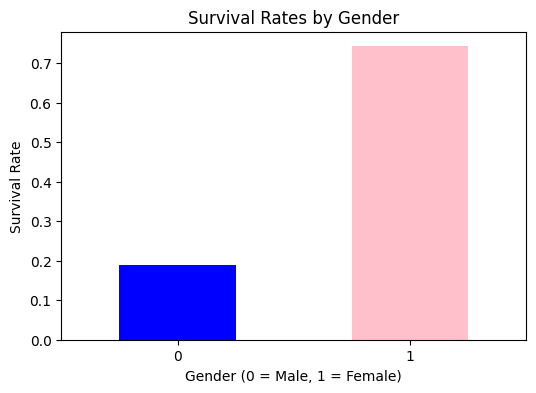

In [13]:
import matplotlib.pyplot as plt

# Calculate survival rates by gender
gender_survival = titanic_data.groupby('Sex')['Survived'].mean()

# Plot survival rates
gender_survival.plot(kind='bar', color=['blue', 'pink'], figsize=(6, 4))
plt.title('Survival Rates by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


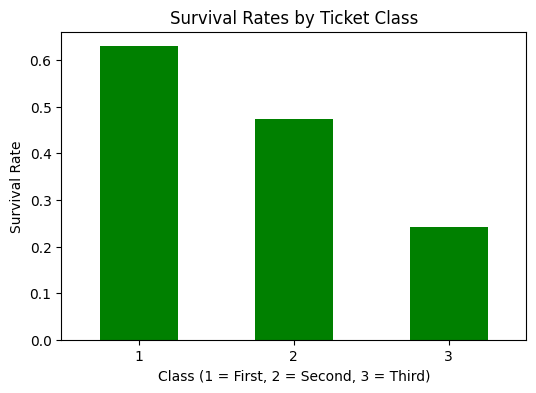

In [14]:
# Calculate survival rates by class
class_survival = titanic_data.groupby('Pclass')['Survived'].mean()

# Plot survival rates
class_survival.plot(kind='bar', color='green', figsize=(6, 4))
plt.title('Survival Rates by Ticket Class')
plt.xlabel('Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


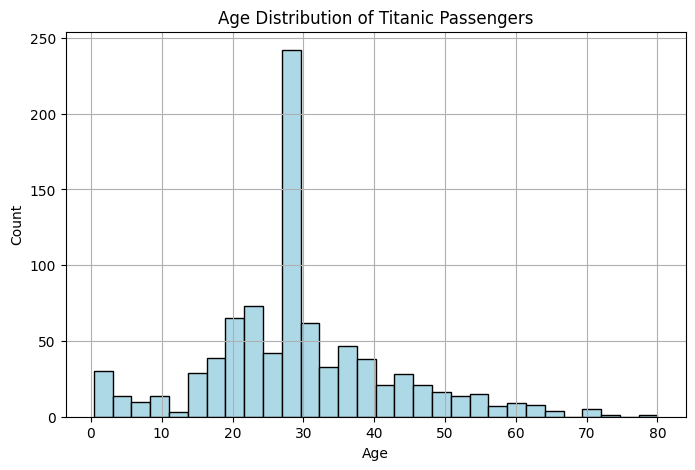

<ipython-input-16-350ce59da72b>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = titanic_data.groupby('AgeGroup')['Survived'].mean()


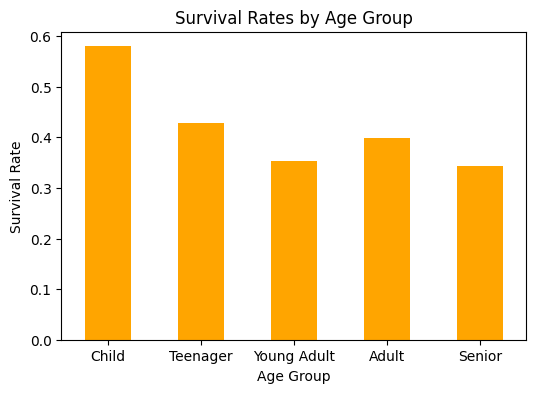

In [16]:
# Survival distribution by Age
plt.figure(figsize=(8, 5))
titanic_data['Age'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Survival rates by Age Group
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 12, 18, 35, 50, 80],
                                  labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

age_survival = titanic_data.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar', color='orange', figsize=(6, 4))
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


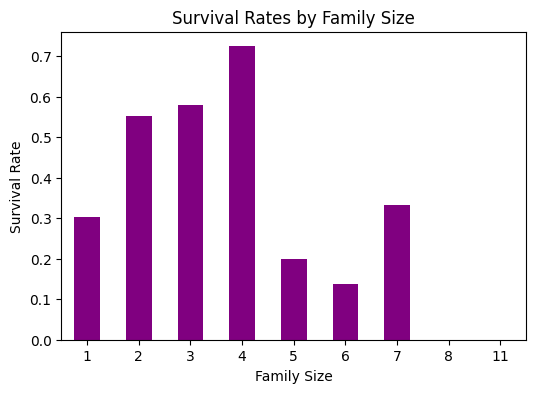

In [17]:
# Create a FamilySize column
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1

# Group by FamilySize and calculate survival rate
family_survival = titanic_data.groupby('FamilySize')['Survived'].mean()

# Plot the results
family_survival.plot(kind='bar', color='purple', figsize=(6, 4))
plt.title('Survival Rates by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


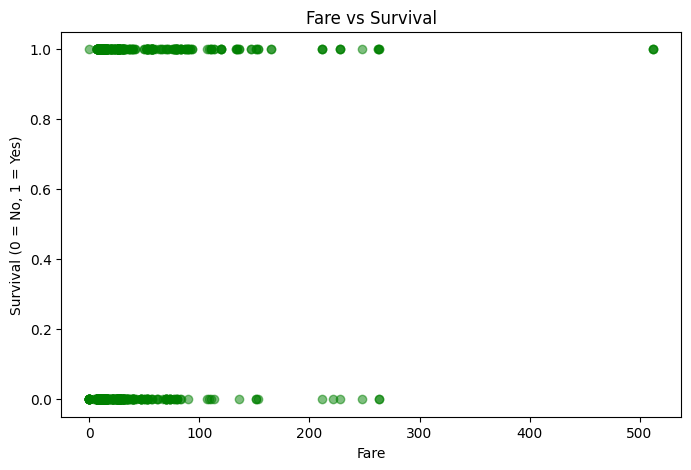

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(titanic_data['Fare'], titanic_data['Survived'], alpha=0.5, color='green')
plt.title('Fare vs Survival')
plt.xlabel('Fare')
plt.ylabel('Survival (0 = No, 1 = Yes)')
plt.show()


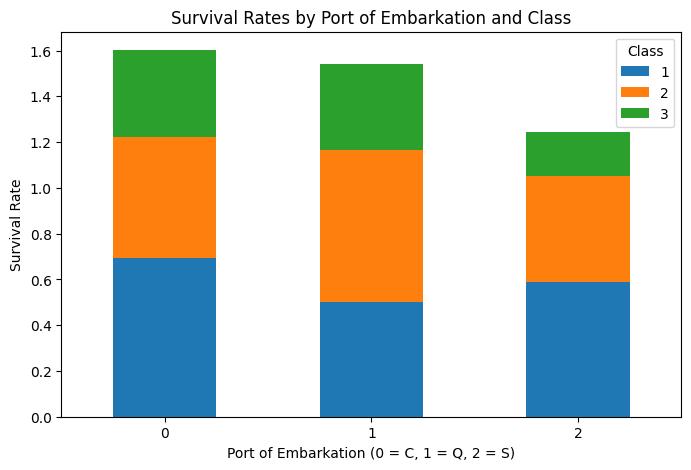

In [19]:
embarked_survival = titanic_data.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack()

# Plot the results
embarked_survival.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Survival Rates by Port of Embarkation and Class')
plt.xlabel('Port of Embarkation (0 = C, 1 = Q, 2 = S)')
plt.ylabel('Survival Rate')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.show()


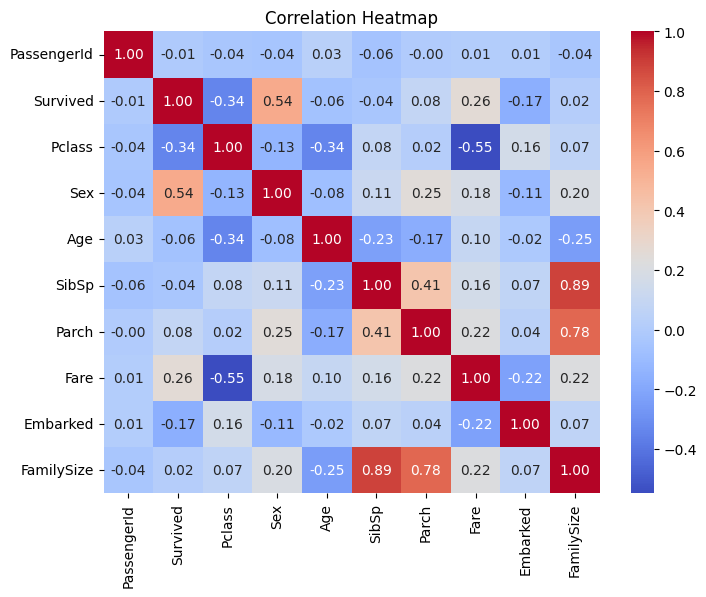

In [21]:
import seaborn as sns

# Select only numerical columns
numerical_data = titanic_data.select_dtypes(include=['number'])

# Generate a correlation matrix
corr = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
